In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import plotly.express as px
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

#READING DATA

In [4]:
df = pd.read_csv('../dataset/collegereview2021.csv')
df2 = pd.read_csv('../dataset/collegereview2022.csv')
df3 = pd.read_csv('../dataset/collegereview2023.csv',lineterminator='\n')

In [5]:
df = df.drop(columns=['Unnamed: 0'])
df2 = df2.drop(columns=['Unnamed: 0'])
df3 = df3.drop(columns=['Unnamed: 0'])

In [6]:
df.head()

,Name,college,review,rating
0,Nimalraj,SNS College of Technology - [SNSCT],"The annual fee for the course is 1,25,000. Now...",6.0
1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7
2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0
3,Shreya sneh,IILM University,There is IGNITE fest in the university held on...,10.0
4,Yuv Raj Singh,Galgotias University - [GU],The civil department is very good in this coll...,6.2


#CLEANING DATA

In [7]:
data = [df , df2 , df3]

In [8]:
def clean_data(data):

    clean_data = []

    for df in data:

        #drop null college
        df = df.dropna(subset = ["college"])

        #fill null values
        df = df.fillna(df['rating'].mean())
        df = df.round(1)

        #check null counts
        print("NUll values in data : ")
        print(df.isnull().sum())

        #check size of data
        print(f"Size of the dataframe  : {list(df.shape)[0]} rows , {list(df.shape)[1]} columns \n")

        clean_data.append(df)
    return clean_data

clean_data = clean_data(data)

NUll values in data : 
Name       0
college    0
review     0
rating     0
dtype: int64
Size of the dataframe  : 18298 rows , 4 columns 

NUll values in data : 
Name       0
college    0
review     0
rating     0
dtype: int64
Size of the dataframe  : 9697 rows , 4 columns 

NUll values in data : 
Name       0
college    0
review     0
rating     0
dtype: int64
Size of the dataframe  : 3340 rows , 4 columns 



In [9]:
def validate_data(data):

    #check null values
    for df in data:
        assert(df.isna().sum().sum() == 0)
        print(f"Total null values in dataframe : {df.isna().sum().sum()}")
    print("All datasets have 0 null values\n")

    #check same no of columns
    c = 4
    for df in data:
        assert(list(df.shape)[1] == c)
        print(f"Columns of the dataframe  : {list(df.shape)[1]} columns")
    print("All datasets have same no of columns.\n")


    #check column names
    n = ("Name" ,"college", "review", "rating")
    for df in data:
        assert(set(df.columns) == set(n))
        print(f"Column names of the dataframe  : {set(df.columns)} ")
    print("All datasets have same name of columns.\n")

    #check datatypes of columns
    d = {'Name': 'O','college': 'O','review': 'O','rating': 'float64'}
    for df in data:
        for col in df.columns:
            assert(df[col].dtype == d[col])
        print(f"Datatypes of all columns of dataframe : {df.dtypes.to_dict()}")
    print("All datasets have same datypes.")


In [10]:
validate_data(clean_data)

Total null values in dataframe : 0
Total null values in dataframe : 0
Total null values in dataframe : 0
All datasets have 0 null values

Columns of the dataframe  : 4 columns
Columns of the dataframe  : 4 columns
Columns of the dataframe  : 4 columns
All datasets have same no of columns.

Column names of the dataframe  : {'review', 'college', 'rating', 'Name'} 
Column names of the dataframe  : {'review', 'college', 'rating', 'Name'} 
Column names of the dataframe  : {'review', 'college', 'rating', 'Name'} 
All datasets have same name of columns.

Datatypes of all columns of dataframe : {'Name': dtype('O'), 'college': dtype('O'), 'review': dtype('O'), 'rating': dtype('float64')}
Datatypes of all columns of dataframe : {'Name': dtype('O'), 'college': dtype('O'), 'review': dtype('O'), 'rating': dtype('float64')}
Datatypes of all columns of dataframe : {'Name': dtype('O'), 'college': dtype('O'), 'review': dtype('O'), 'rating': dtype('float64')}
All datasets have same datypes.


#MERGING INTO ONE DF

In [11]:
def merge_data(data):

    #create empty dataframe
    merged_df = pd.DataFrame(columns = ['Name', 'college', 'review', 'rating', 'year'])

    for i,df in enumerate(data):

        # add year columns
        df['year'] = '202' + str(i+1)

        #concat all dataframes
        merged_df = pd.concat([merged_df,df])

    return merged_df

merged_df = merge_data(clean_data)

In [12]:
merged_df.head()

,Name,college,review,rating,year
0,Nimalraj,SNS College of Technology - [SNSCT],"The annual fee for the course is 1,25,000. Now...",6.0,2021
1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,2021
2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,2021
3,Shreya sneh,IILM University,There is IGNITE fest in the university held on...,10.0,2021
4,Yuv Raj Singh,Galgotias University - [GU],The civil department is very good in this coll...,6.2,2021


In [13]:
merged_df.rating.value_counts()

rating
8.0     2423
10.0    2359
9.0     1970
8.3     1674
7.8     1475
        ... 
2.6        2
1.5        2
5.1        1
1.4        1
1.2        1
Name: count, Length: 82, dtype: int64

In [14]:
merged_df.college.value_counts()

college
National Institute of Technology - [NIT]                            595
Chandigarh University - [CU]                                        504
Delhi Technological University - [DTU]                              451
Netaji Subhas University of Technology - [NSUT]                     441
Lovely Professional University - [LPU]                              420
                                                                   ... 
PSG College of Arts and Science                                       1
Sant Kabir Vidyapeeth Mahavidyalaya                                   1
Hemwati Nandan Bahuguna Uttarakhand Medical Education University      1
Mulshi Institute of Business Management - [MIBM]                      1
Gandhiji Institute of Science and Technology - [GIST]                 1
Name: count, Length: 2876, dtype: int64

In [15]:
new_df = merged_df

In [16]:
data = merged_df

#RATINGS

<Axes: ylabel='Frequency'>

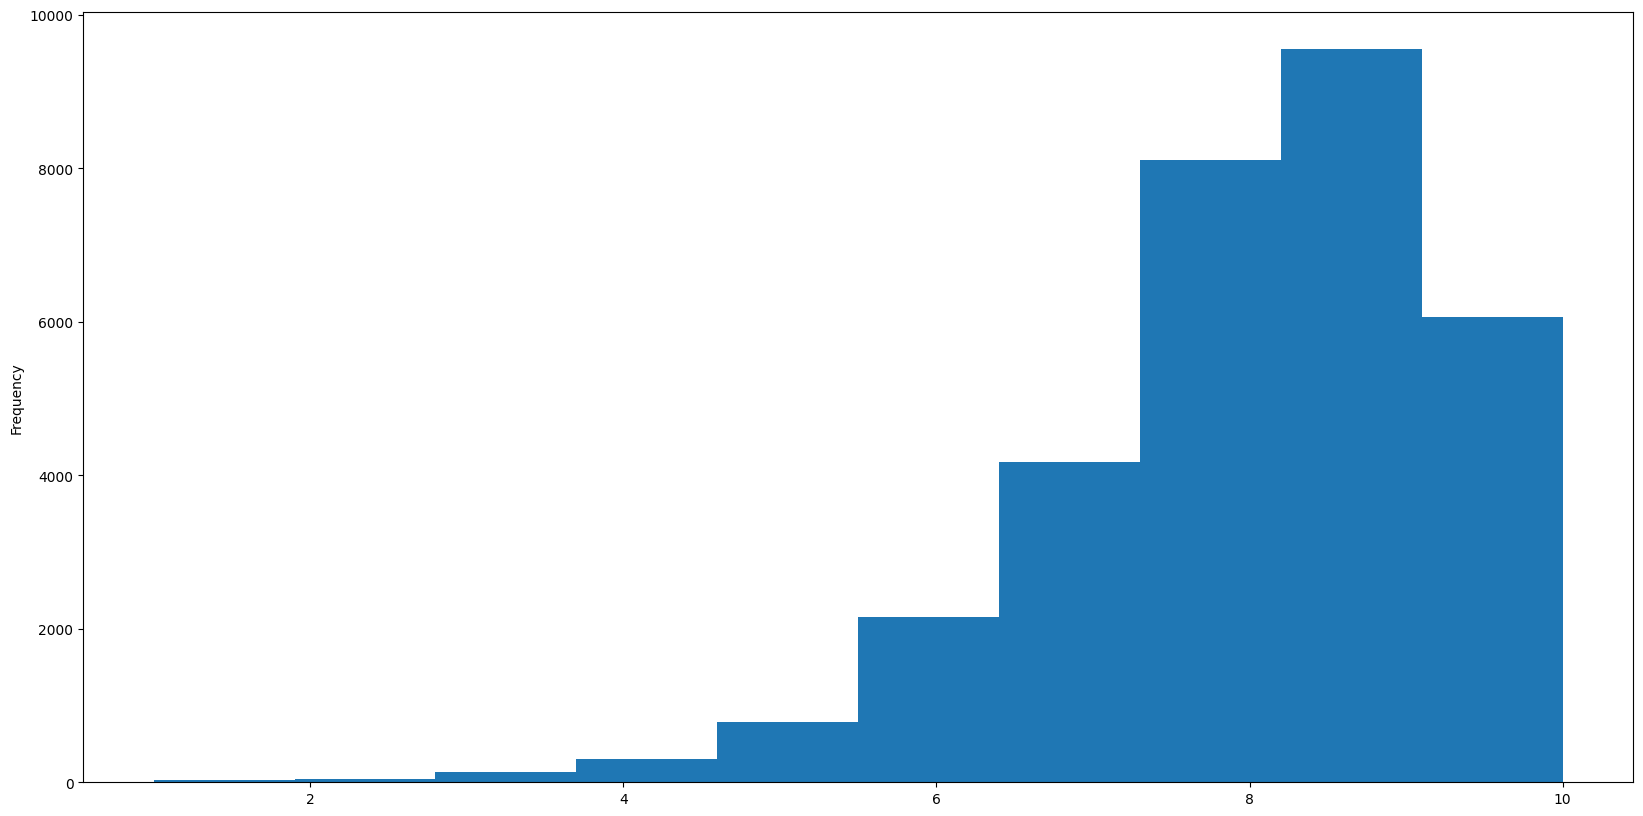

In [30]:
avg_rating = data['rating'].mean()
max_rating = data['rating'].max() 
data['rating'].plot.hist(bins=10)

#TOP 10 colleges with more than 30 reviews


In [35]:
filtered_colleges = data.groupby('college').filter(lambda x: len(x) > 40)

average_ratings_by_college = filtered_colleges.groupby('college')['rating'].mean().reset_index()
print(type(average_ratings_by_college))
sorted_average_ratings = average_ratings_by_college.sort_values(by='rating', ascending=False)

top_5_colleges = sorted_average_ratings.head(5)

print(top_5_colleges)

<class 'pandas.core.frame.DataFrame'>
                                               college    rating
62                           ITM SLS Baroda University  9.237778
123             Roorkee College of Engineering - [RCE]  9.220755
107              NRI Institute of Technology - [NRIIT]  9.164912
13   Birla Institute of Technology and Science - [B...  9.086047
156  Vignan's Foundation for Science, Technology, a...  9.076389


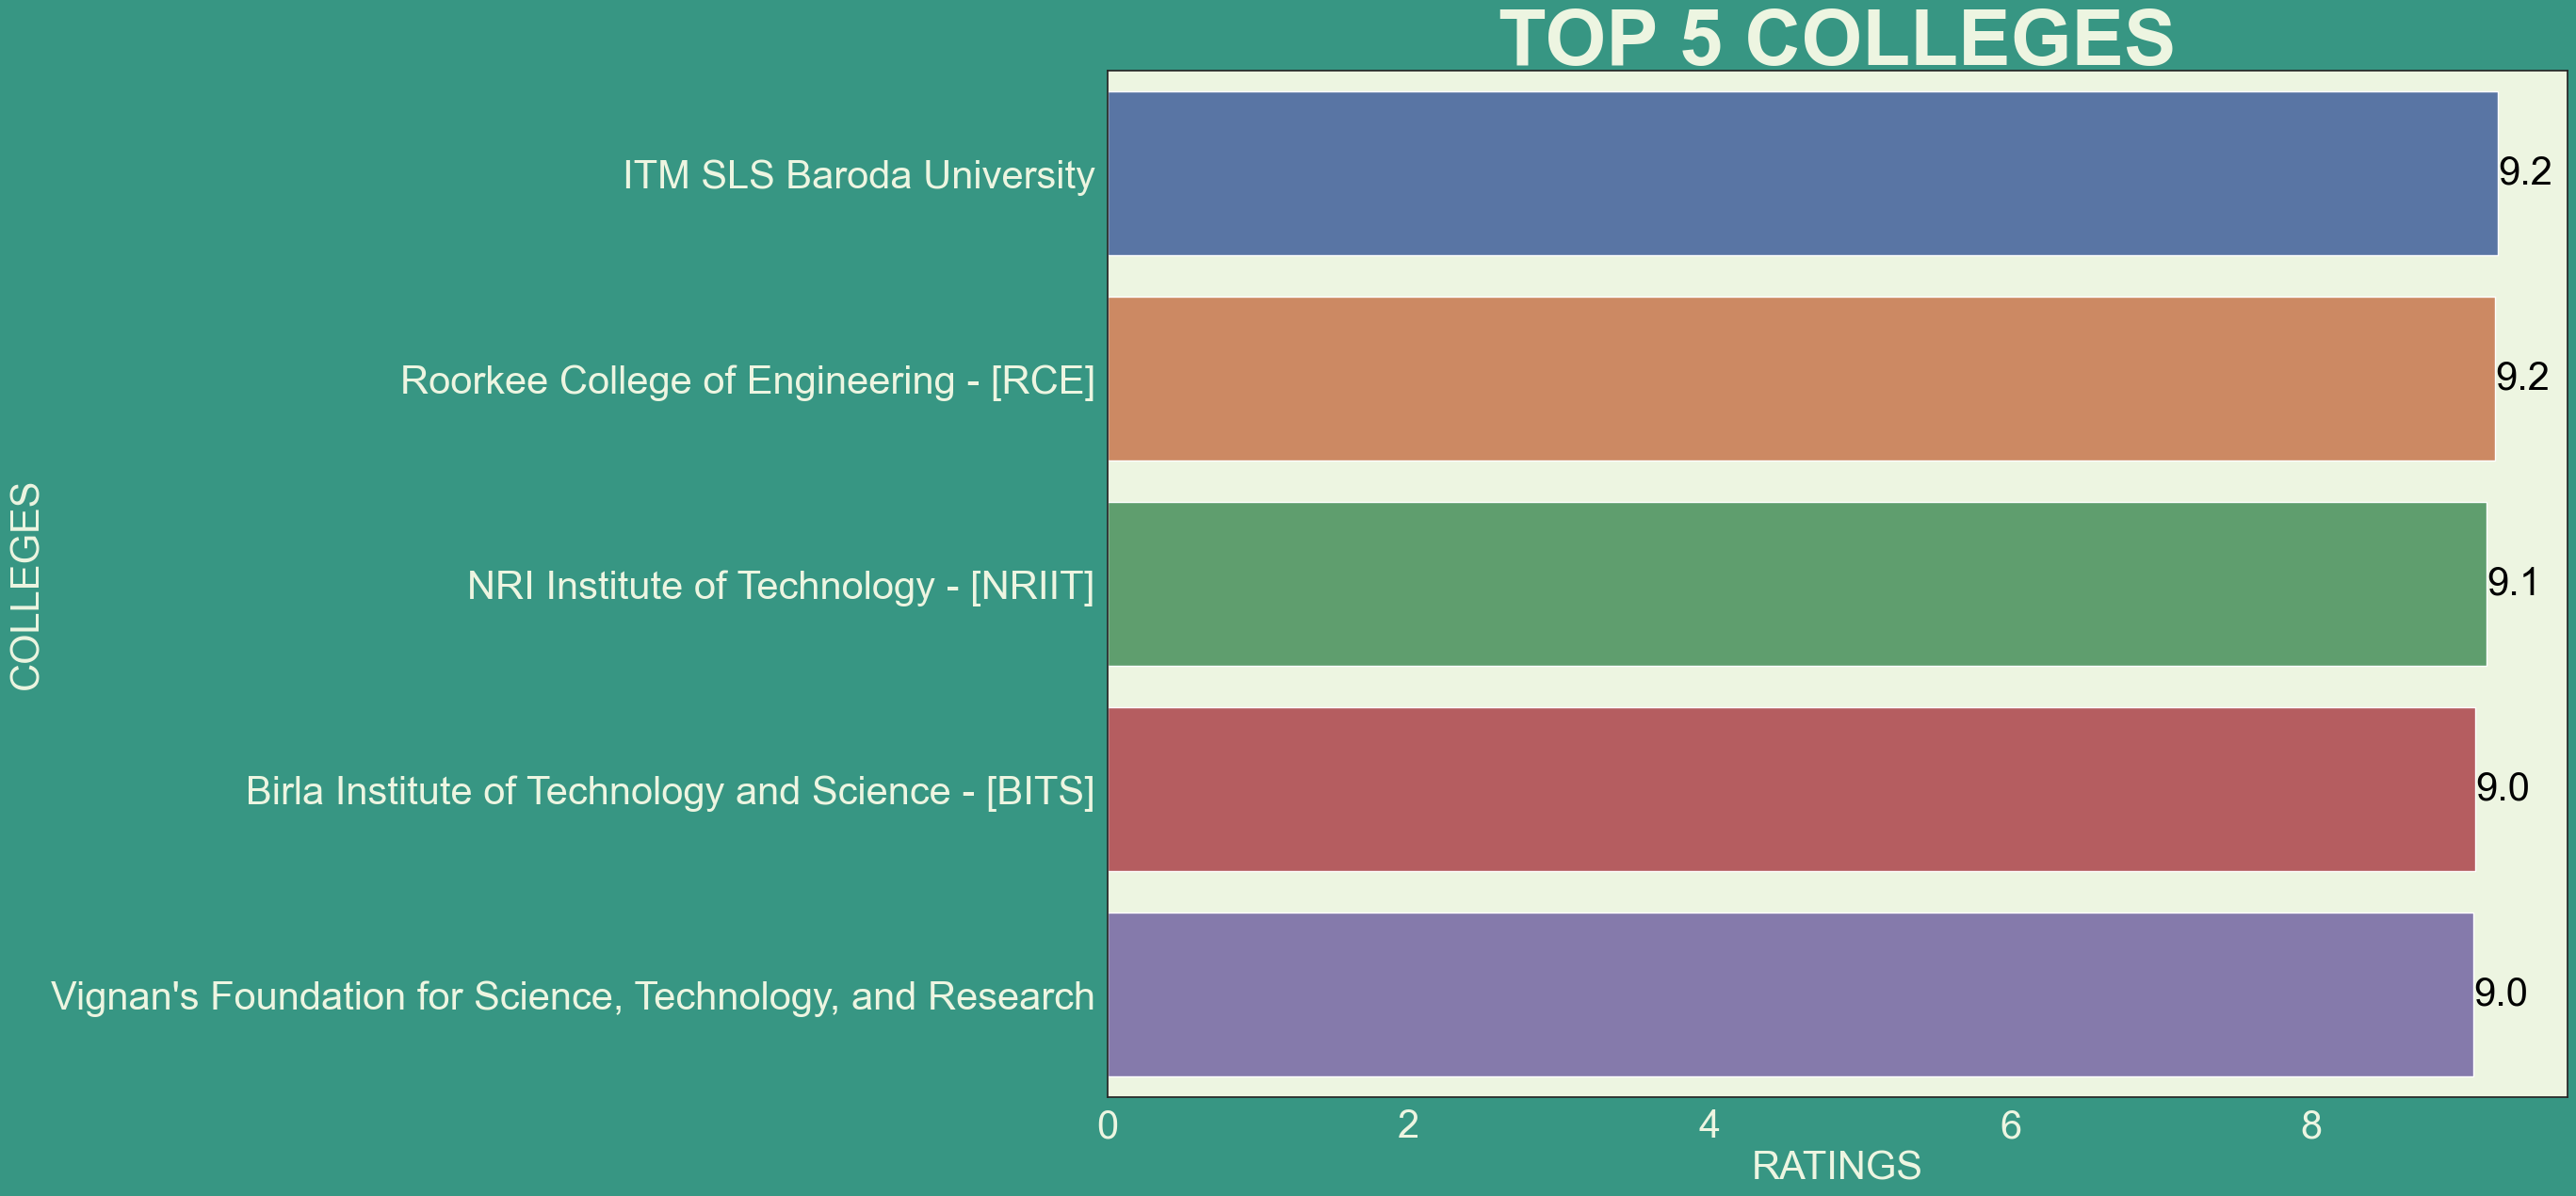

In [36]:
sns.set()
sns.set(font_scale = 2.5)
sns.set_style("white", {'axes.facecolor': '#edf5e1' , 'figure.facecolor': '#379683'})
sns.barplot(x = top_5_colleges.rating , y = top_5_colleges.college , orient='h')

ax = plt.gca()
for i, v in enumerate(top_5_colleges.rating):
    ax.text(v, i, str(v)[:3], color='black', ha='left', va='center')

title_font = {'fontsize': 60, 'fontweight': 'bold', 'verticalalignment': 'center'}
plt.title("TOP 5 COLLEGES", color = '#edf5e1' , **title_font)
plt.xlabel("RATINGS", color = '#edf5e1')
plt.ylabel("COLLEGES", color = '#edf5e1')

ax.tick_params(axis='x', colors='#edf5e1', labelsize = 30)
ax.tick_params(axis='y', colors='#edf5e1', labelsize = 30)
ax.set_title("TOP 5 COLLEGES", **title_font, pad=20)

plt.subplots_adjust(top=1.2)
plt.show()

#TOP 5 COLLEGES with highest number of reviews


In [37]:

review_count_by_college = data.groupby('college')['review'].nunique().reset_index()

sorted_review_count = review_count_by_college.sort_values(by = 'review',ascending=False)

top_5_colleges_by_reviews = sorted_review_count.head(5)

print(top_5_colleges_by_reviews)

                                              college  review
1798         National Institute of Technology - [NIT]     509
449                      Chandigarh University - [CU]     465
592            Delhi Technological University - [DTU]     346
1481           Lovely Professional University - [LPU]     340
1818  Netaji Subhas University of Technology - [NSUT]     275


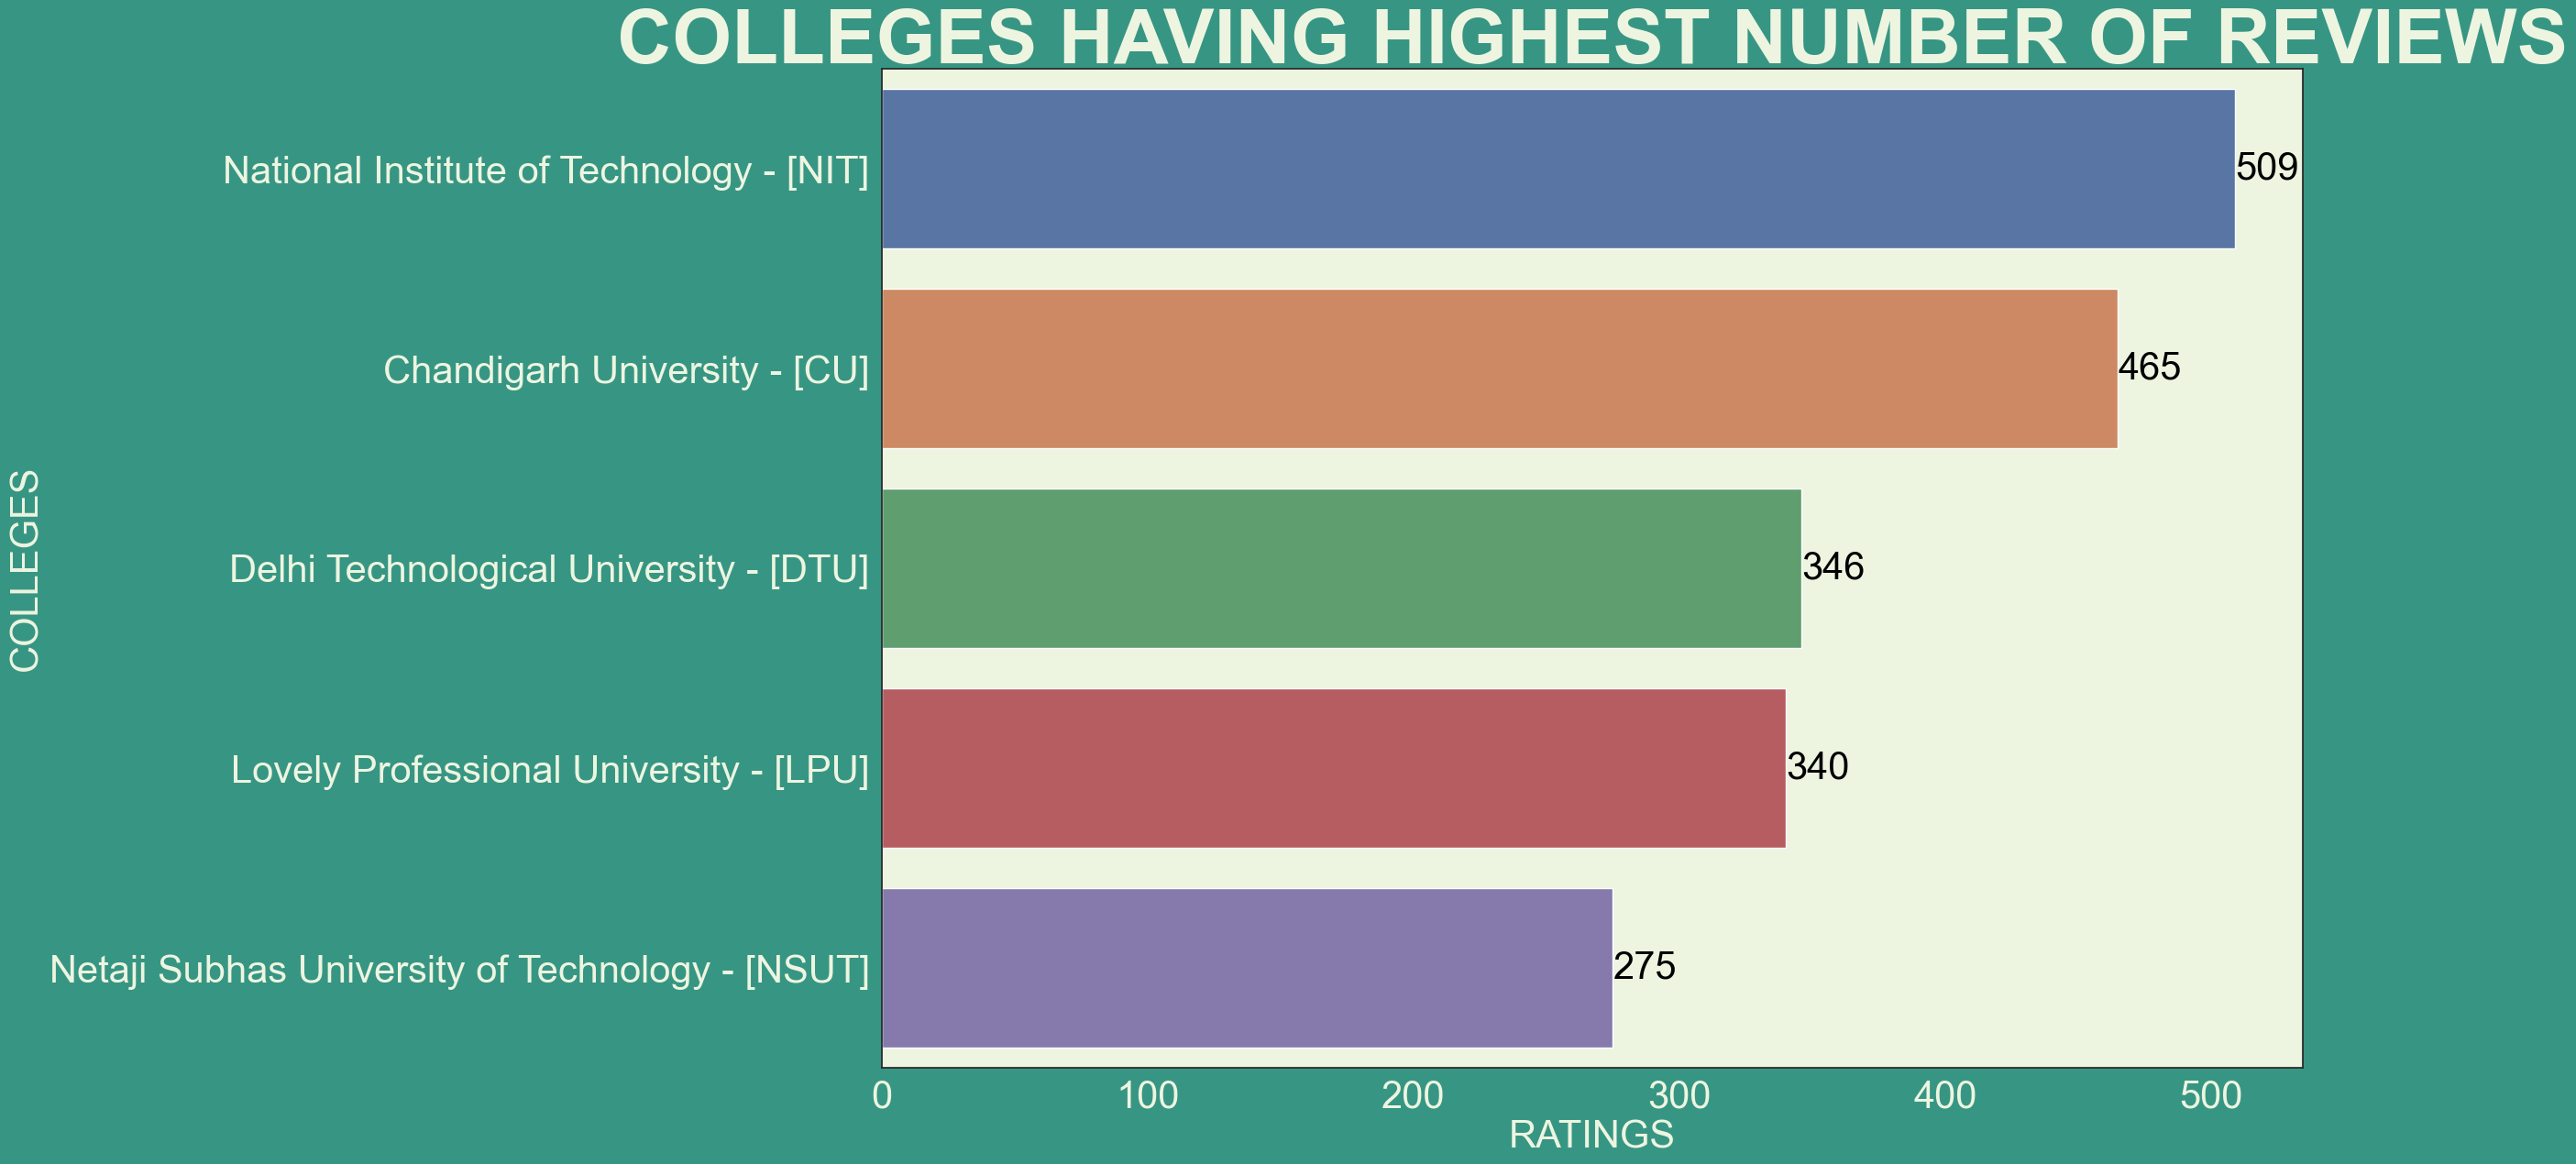

In [38]:
sns.set()
sns.set(font_scale = 2.5)
sns.set_style("white", {'axes.facecolor': '#edf5e1' , 'figure.facecolor': '#379683'})
sns.barplot(x = top_5_colleges_by_reviews.review, y = top_5_colleges_by_reviews.college , orient='h')

ax = plt.gca()
for i, v in enumerate(top_5_colleges_by_reviews.review):
    ax.text(v, i, str(v)[:3], color='black', ha='left', va='center')

title_font = {'fontsize': 60, 'fontweight': 'bold', 'verticalalignment': 'center'}
plt.title("TOP 5 COLLEGES", color = '#edf5e1' , **title_font)
plt.xlabel("RATINGS", color = '#edf5e1')
plt.ylabel("COLLEGES", color = '#edf5e1')

ax.tick_params(axis='x', colors='#edf5e1', labelsize = 30)
ax.tick_params(axis='y', colors='#edf5e1', labelsize = 30)
ax.set_title("COLLEGES HAVING HIGHEST NUMBER OF REVIEWS", **title_font, pad=20)

plt.subplots_adjust(top=1.2)
plt.show()

In [27]:
max_ratings_by_college = data[data['rating'] > 9].groupby('college')['rating'].count().reset_index()

sorted_max_ratings = max_ratings_by_college.sort_values(by='rating', ascending=False)

max_rating_colleges = sorted_max_ratings.head(5)

max_rating_colleges

,college,rating
274,Delhi Technological University - [DTU],98
215,Chandigarh University - [CU],89
846,National Institute of Technology - [NIT],84
698,Lovely Professional University - [LPU],77
855,Netaji Subhas University of Technology - [NSUT],71


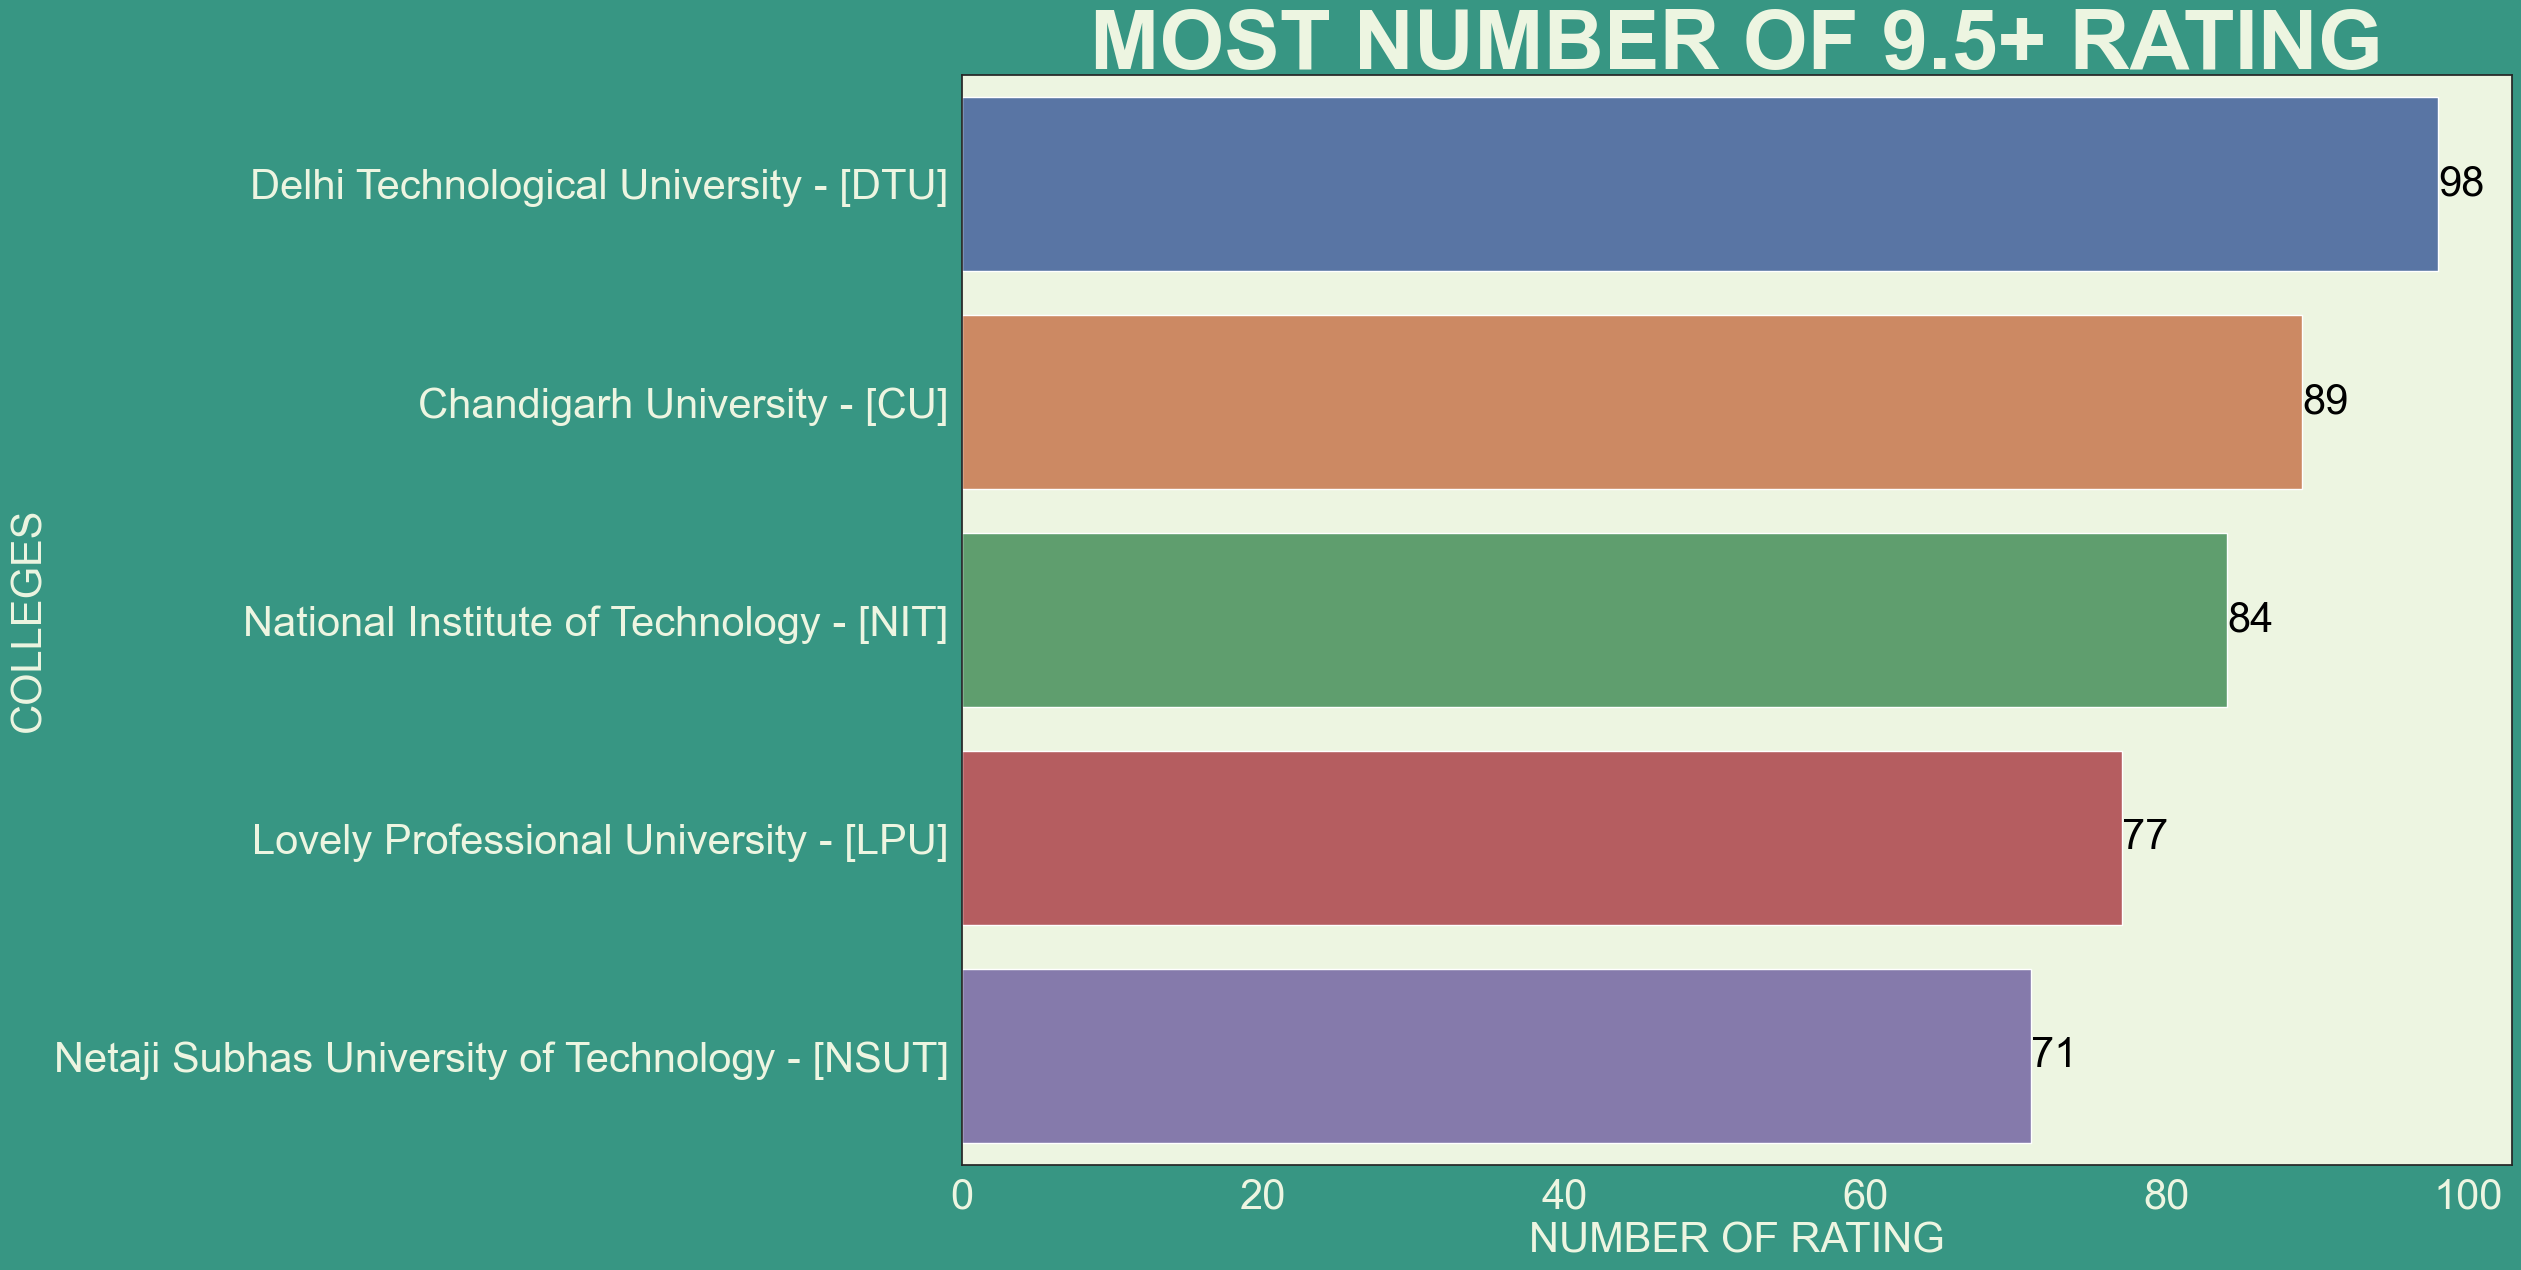

In [33]:
sns.set()
sns.set(font_scale = 2.5)
sns.set_style("white", {'axes.facecolor': '#edf5e1' , 'figure.facecolor': '#379683'})
sns.barplot(x = max_rating_colleges.rating, y = max_rating_colleges.college , orient='h')

ax = plt.gca()
for i, v in enumerate(max_rating_colleges.rating):
    ax.text(v, i, str(v), color='black', ha='left', va='center')

title_font = {'fontsize': 60, 'fontweight': 'bold', 'verticalalignment': 'center'}
plt.title("MOST NUMBER OF 9.5+ RATING", color = '#edf5e1' , **title_font)
plt.xlabel("NUMBER OF RATING", color = '#edf5e1')
plt.ylabel("COLLEGES", color = '#edf5e1')

ax.tick_params(axis='x', colors='#edf5e1', labelsize = 30)
ax.tick_params(axis='y', colors='#edf5e1', labelsize = 30)
ax.set_title("MOST NUMBER OF 9.5+ RATING", **title_font, pad=20)

plt.subplots_adjust(top=1.2)
plt.show()

In [19]:
# pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


#APPLYING NLP ANALYSIS

In [21]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')
new_df['review'] = new_df['review'].astype(str).str.lower()
new_df['text_token']=new_df['review'].apply(regexp.tokenize)
new_df.head(3)

,Name,college,review,rating,year,text_token
0,Nimalraj,SNS College of Technology - [SNSCT],"the annual fee for the course is 1,25,000. now...",6.0,2021,"[the, annual, fee, for, the, course, is, 1, 25..."
1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],the hostel life and social life in this colleg...,9.7,2021,"[the, hostel, life, and, social, life, in, thi..."
2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],i chose this course because i was interested i...,8.0,2021,"[i, chose, this, course, because, i, was, inte..."


In [22]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)
new_df['text_token'] = new_df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
new_df.head(3)

new_df['text_string'] = new_df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
new_df[['review', 'text_token', 'text_string']].head()
all_words = ' '.join([word for word in new_df['text_string']])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/int1463/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
import nltk
nltk.download('punkt')
tokenized_words = nltk.tokenize.word_tokenize(all_words)
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
fdist
new_df['text_string_fdist'] = new_df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
new_df[['review', 'text_token', 'text_string', 'text_string_fdist']].head()

[nltk_data] Downloading package punkt to /Users/int1463/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,text_token,text_string,text_string_fdist
0,"the annual fee for the course is 1,25,000. now...","[annual, fee, course, 1, 25, 000, forced, pay,...",annual fee course 000 forced pay fees early to...,annual fee course 000 forced pay fees early to...
1,the hostel life and social life in this colleg...,"[hostel, life, social, life, college, enjoyabl...",hostel life social life college enjoyable almo...,hostel life social life college enjoyable almo...
2,i chose this course because i was interested i...,"[chose, course, interested, mechanical, engine...",chose course interested mechanical engineering...,chose course interested mechanical engineering...
3,there is ignite fest in the university held on...,"[ignite, fest, university, held, campus, avail...",ignite fest university held campus availabilit...,ignite fest university held campus availabilit...
4,the civil department is very good in this coll...,"[civil, department, good, college, faculty, me...",civil department good college faculty member w...,civil department good college faculty member w...


In [25]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()
new_df['text_string_lem'] = new_df['text_string_fdist'].apply(wordnet_lem.lemmatize)
new_df['is_equal']= (new_df['text_string_fdist']==new_df['text_string_lem'])
new_df.is_equal.value_counts()

[nltk_data] Downloading package wordnet to /Users/int1463/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/int1463/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


is_equal
True     31334
False        1
Name: count, dtype: int64

In [26]:
new_df.head()

,Name,college,review,rating,year,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,Nimalraj,SNS College of Technology - [SNSCT],"the annual fee for the course is 1,25,000. now...",6.0,2021,"[annual, fee, course, 1, 25, 000, forced, pay,...",annual fee course 000 forced pay fees early to...,annual fee course 000 forced pay fees early to...,annual fee course 000 forced pay fees early to...,True
1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],the hostel life and social life in this colleg...,9.7,2021,"[hostel, life, social, life, college, enjoyabl...",hostel life social life college enjoyable almo...,hostel life social life college enjoyable almo...,hostel life social life college enjoyable almo...,True
2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],i chose this course because i was interested i...,8.0,2021,"[chose, course, interested, mechanical, engine...",chose course interested mechanical engineering...,chose course interested mechanical engineering...,chose course interested mechanical engineering...,True
3,Shreya sneh,IILM University,there is ignite fest in the university held on...,10.0,2021,"[ignite, fest, university, held, campus, avail...",ignite fest university held campus availabilit...,ignite fest university held campus availabilit...,ignite fest university held campus availabilit...,True
4,Yuv Raj Singh,Galgotias University - [GU],the civil department is very good in this coll...,6.2,2021,"[civil, department, good, college, faculty, me...",civil department good college faculty member w...,civil department good college faculty member w...,civil department good college faculty member w...,True


#WORDCLOUD OF REVIEWS

In [27]:
all_words_lem = ' '.join([word for word in new_df['text_string_lem']])

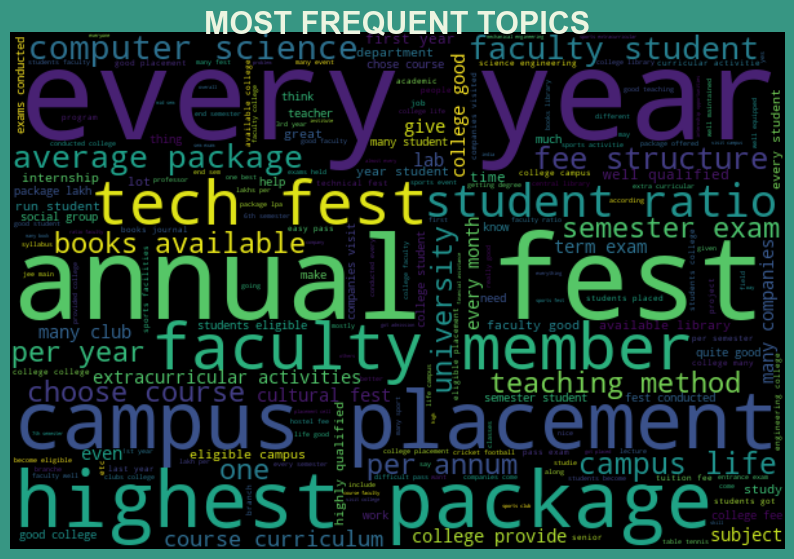

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
title_font = {'fontsize': 22, 'fontweight': 'bold', 'verticalalignment': 'center'}
wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.title("MOST FREQUENT TOPICS", color = '#edf5e1' , **title_font)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');